<a href="https://colab.research.google.com/github/Hashhhhhhhh/ML-with-Python/blob/main/Overfitting_and_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OVERFITTING, UNDERFITTING AND GENERALIZATION**

In machine learning, the goal is to build a model that can make accurate predictions on new, unseen data.

 ***Generalization*** refers to a machine learning model's ability to perform well on new, previously unseen data, after being trained on a specific dataset. It's the ultimate objective of building any predictive model. A model that generalizes well has learned the true underlying patterns and relationships in the data, rather than just memorizing the training examples.

***Overfitting*** occurs when a machine learning model learns the training data too well, including the noise and random fluctuations in the data, rather than the underlying patterns. It's like a student who memorizes every answer in the textbook for a test but doesn't actually understand the concepts. In iterative training algorithms, training for too many epochs can lead to the model starting to learn the noise. It happens when the training dataset is too small and doesn't accurately represent the diversity of the real-world data.

***Underfitting*** occurs when a machine learning model is too simple to capture the underlying patterns in the training data. It fails to learn the significant relationships between features and the target variable. It occurs when the model hasn't been trained for enough iterations to learn the patterns,  model is too basic for the complexity of the data (e.g., using a linear model for highly non-linear data).








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

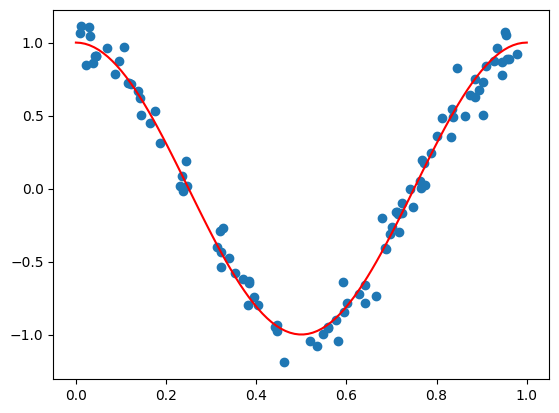

In [18]:
def true_func(X): #generate the points that would lie on the function
  return np.cos(2*np.pi*X)
n_samples=100
X=np.random.rand(n_samples)
Y=true_func(X)+np.random.randn(n_samples)*0.1 #added noise along with the original function's points
plt.scatter(X,Y)
plt.plot(np.linspace(0, 1, 100), np.cos(2* np.pi * np.linspace(0, 1, 100)), color='red')
plt.show()


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

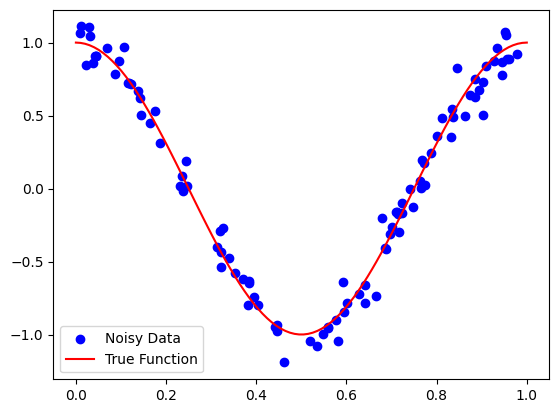

In [22]:
plt.scatter(X,Y,label="Noisy Data",color='blue')
plt.plot(np.linspace(0, 1, 100), np.cos(2* np.pi * np.linspace(0, 1, 100)), color='red',label="True Function")
plt.legend()
plt.show()

Some machine learning libraries (like scikit-learn's LinearRegression) expect the input features to be in a 2D array, where each row is a sample and each column is a feature. Even if you have only one feature, you must reshape your array so that it has shape (number of samples, 1)

In [24]:
X_reshaped=X.reshape(-1,1)
print(X_reshaped.shape)


(100, 1)


Example of underfitting

0.47430184511342


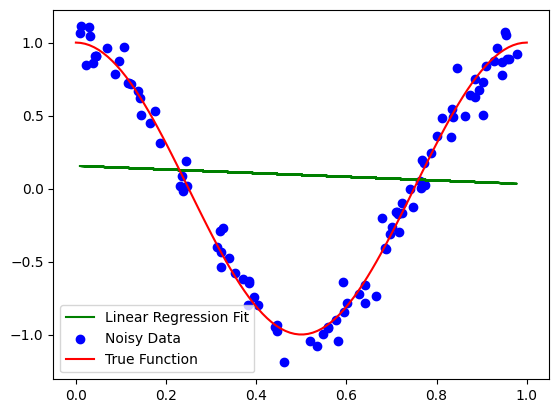

In [33]:
#Fitting linear regression model
LR=LinearRegression()
LR.fit(X_reshaped,Y)
#Prediction
Y_pred=LR.predict(X_reshaped)
#accuracy score
print(mean_squared_error(Y,Y_pred))
y_pred = LR.predict(X_reshaped)
plt.plot(X_reshaped, y_pred, label="Linear Regression Fit", color="green")
plt.scatter(X,Y,label="Noisy Data",color='blue')
plt.plot(np.linspace(0, 1, 100), np.cos(2* np.pi * np.linspace(0, 1, 100)), color='red',label="True Function")
plt.legend()
plt.show()


Example of overfitting

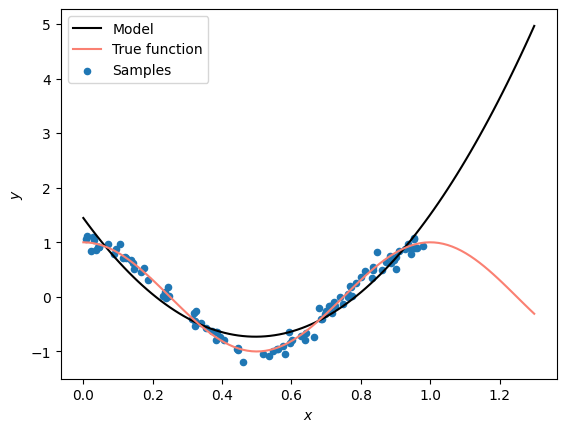

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

linear_regression = LinearRegression()

pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
pipeline.fit(X[:, np.newaxis], Y)

X_test = np.linspace(0,1.3, 100)
fig, ax = plt.subplots(1)
ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model", color='black')
ax.plot(X_test, true_func(X_test), label="True function",color='salmon')
ax.scatter(X, Y,s=20, label="Samples")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()
pass;